## FOV drift

Finally, we can also visualize how FOV drift can affect solutions in a single colony image

In [1]:
import os
import pylab
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from DLITE.SurfaceEvolver import SurfaceEvolver
from DLITE.PlottingFunctions import PlottingFunctions

Let's use a single time-point of a the synthetic data time-series in Fig 2

In [2]:
os.chdir(r'../Notebooks/data/Synthetic_data/Fig_2')
number = 5
name_first = 'surface_dec_edge_groups_80_150_numbers_'
name_end = '.fe.txt'

First, we instantiate the class

In [3]:
SurfaceEvolverInstance = SurfaceEvolver(name_first, name_end)

Now, we call the FOV drift method of the SurfaceEvolver class

We do this for both solvers so that we can compare results

In [4]:
colonies = SurfaceEvolverInstance.FOV_Drift(number, solver = 'CellFIT')

Number of fit edges: 122
Number of cells 25 25
Solver is CellFIT
First colony {'0': <DLITE.cell_describe.colony object at 0x122769f60>}
Next colony number 1
Next colony number 2
Next colony number 3
Next colony number 4
Next colony number 5
Next colony number 6
Next colony number 7
Next colony number 8


In [5]:
colonies2 = SurfaceEvolverInstance.FOV_Drift(number, solver = 'DLITE')

Number of fit edges: 122
Number of cells 25 25
guess tension is [0.06, 0.69, 0.64, 0.72, 0.34, 0.42, 0.84, 0.65, 0.04, 0.37, 0.6, 0.96, 0.08, 0.9, 0.84, 0.4, 0.45, 0.84, 0.23, 0.76, 0.62, 0.42, 0.49, 0.29, 0.69, 0.25, 0.98, 0.24, 0.64, 0.53, 0.85, 0.0, 0.03, 0.49, 0.15, 0.99, 0.47]
Function value 0.34998262077341724
Solution [0.83385487 0.80320334 0.80636861 0.82559555 0.53866841 0.60855716
 0.53419777 1.03381848 0.52527066 0.64210733 0.51207691 0.62698961
 0.59742749 0.76159962 0.61913783 0.77291789 0.79993934 0.81216099
 0.78652269 0.75461855 0.74362185 0.6340102  0.57507614 0.5875849
 0.58440136 0.32428979 0.40498624 0.46491279 0.47079836 0.396249
 0.05374398 0.43580012 0.46564129 0.22948324 0.19824762 0.21959093
 0.47      ]


-----------------------------
guess pressure is [0.0029803842144703135, 0.0029803842144703135, 0.0029803842144703135, 0.0029803842144703135, 0.0029803842144703135]
Function value 1.6799070578442595e-05
Solution [0.00178126 0.00265289 0.00556598 0.00192237 0.0

Function value 0.5443025857245052
Solution [0.32799035 0.4662541  0.46169113 0.43866046 0.4739378  0.14579632
 0.23668231 0.21375315 0.10356842 0.28486775 0.13122168 0.23651348
 0.37701979 0.28591209 0.28214291 0.39259286 0.28742636 0.30187096
 0.27220287 0.29579917 0.24315121 0.34277112 0.82056874 0.84990233
 0.37194664 0.6302721  0.86508816 0.82122628 0.8067958  0.80554864
 0.88150038 0.87964896 0.55158331 0.86972221 0.85584031 0.8
 0.8377358 ]


-----------------------------
guess pressure is [0.002715069698437751, 0.002715069698437751, 0.002715069698437751]
Function value 0
Solution [0.00271507 0.00271507 0.00271507]


-----------------------------
Next colony number 6
guess tension is [0.49, 0.2, 0.72, 0.74, 0.5, 0.54, 0.32, 0.5, 0.75, 0.72, 0.21, 0.6, 0.44, 0.99, 0.94, 0.01, 0.55, 0.52, 0.72, 0.41, 0.96, 0.16]
Function value 0.25580095250774376
Solution [0.49       0.47037104 0.39173838 0.26009346 0.2955522  0.29568409
 0.27460606 0.24761073 0.3100353  0.35942828 0.78726429 0.856

Now that we have the colonies, we can visualize the colony tensions

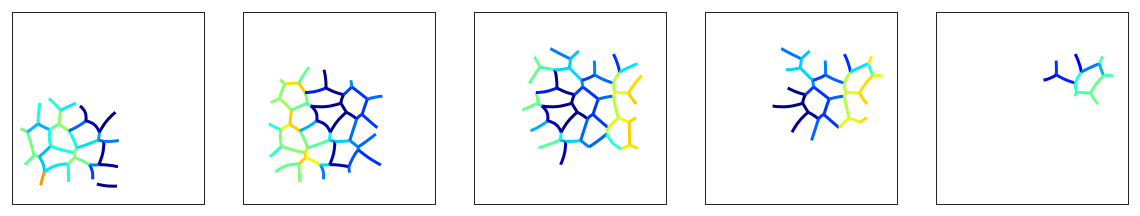

In [6]:
%matplotlib inline
sns.set(style="white")
sns.set_context("paper", font_scale = 2.5)

total = 5
fig, axn = plt.subplots(1, total, figsize = (20,20),sharey=True)
nums= [0,2, 4,6, 8]

for i, ax in enumerate(axn.flat):
    col = colonies[str(nums[i])]
    tensions = [e.ground_truth for e in col.tot_edges]
    mean_ten = np.mean(tensions)
    tensions = [e/mean_ten for e in tensions]

    col.plot_tensions(ax, fig, tensions, min_x=450, max_x=550, min_y=430, max_y=550, 
                      min_ten = 0, max_ten = 3, specify_color = 'jet',cbar = 'no', lw = 3)
    plt.setp(ax.get_yticklabels(), visible=False)
    plt.setp(ax.get_xticklabels(), visible=False)
#     ax.set(xlim = [400,580], ylim = [400,580], aspect = 1)
    ax.set(xlim = [200,800], ylim = [200,800], aspect = 1)


We can also plot heatmaps using the same functions described before

In [7]:
PlottingFunctionsInstance = PlottingFunctions()

In [8]:
# We first find labels of edges that are present in all the colonies
common_edge_labels = PlottingFunctionsInstance.get_repeat_edge(colonies)
common_cell_labels = PlottingFunctionsInstance.get_repeat_cell(colonies)

common_edge_labels2 = PlottingFunctionsInstance.get_repeat_edge(colonies2)
common_cell_labels2 = PlottingFunctionsInstance.get_repeat_cell(colonies2)

In [9]:
# Make the dataframes
edges_dataframe, cells_dataframe = PlottingFunctionsInstance.seaborn_plot(None, colonies,
                                                                                  common_edge_labels,
                                                                                  common_cell_labels,
                                                                                  ground_truth = True)

# Make the dataframes
edges_dataframe2, cells_dataframe2 = PlottingFunctionsInstance.seaborn_plot(None, colonies2,
                                                                                  common_edge_labels2,
                                                                                  common_cell_labels2,
                                                                                  ground_truth = True)

/Users/ritvikvasan/Documents/repos/DLITE/DLITE/PlottingFunctions.py:1352: RuntimeWarning: invalid value encountered in true_divide
  cell_data['Pressures'].append([2*((c.pressure - min_pres) / float(max_pres - min_pres)) - 1 for c in v.cells if c.label == cell_lab][0])
/Users/ritvikvasan/Documents/repos/DLITE/DLITE/PlottingFunctions.py:1360: RuntimeWarning: invalid value encountered in true_divide
  - min_pres) / float(max_pres - min_pres))
/Users/ritvikvasan/Documents/repos/DLITE/DLITE/PlottingFunctions.py:1352: RuntimeWarning: invalid value encountered in double_scalars
  cell_data['Pressures'].append([2*((c.pressure - min_pres) / float(max_pres - min_pres)) - 1 for c in v.cells if c.label == cell_lab][0])
/Users/ritvikvasan/Documents/repos/DLITE/DLITE/PlottingFunctions.py:1355: RuntimeWarning: invalid value encountered in double_scalars
  if c.label == cell_lab][0])
/Users/ritvikvasan/Documents/repos/DLITE/DLITE/PlottingFunctions.py:1360: RuntimeWarning: invalid value encountered in

In [10]:
tension_table = edges_dataframe.pivot_table(
        values='Local_normalized_tensions', 
        index=['Edge_Labels'], 
        columns='Time')

ground_truth_tension_table = edges_dataframe.pivot_table(
        values='Ground_truth', 
        index=['Edge_Labels'], 
        columns='Time')

tension_table2 = edges_dataframe2.pivot_table(
        values='Local_normalized_tensions', 
        index=['Edge_Labels'], 
        columns='Time')

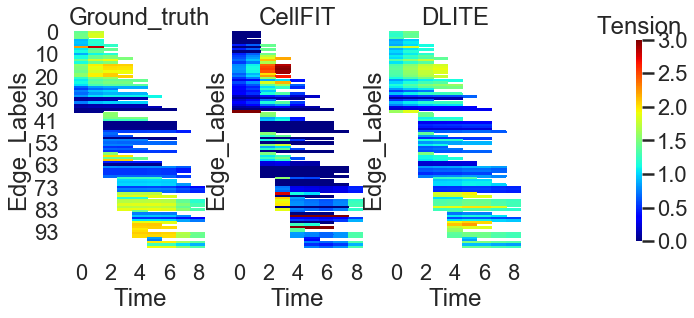

In [11]:
import seaborn as sns

sns.set_context('poster')
fig, axn = plt.subplots(1, 3, figsize = (8,4),sharey=True)
cbar_ax = fig.add_axes([1.1, .15, .01, .7], title = 'Tension')

for i, ax in enumerate(axn.flat):
    if i == 0:
        df = ground_truth_tension_table
        title = 'Ground_truth'
    elif i == 1:
        df = tension_table
        title = 'CellFIT'
    elif i == 2:
        df = tension_table2
        title = 'DLITE'
    ax.set_title(title)
    sns.heatmap(df, ax=ax,
                cbar=i == 0, vmin=0, vmax=3, cmap = 'jet',
                cbar_ax=None if i else cbar_ax)